In [25]:
from keras.datasets import mnist
from keras.layers import Input,Conv2D,Activation,Dense,Lambda,Flatten,Embedding,PReLU,BatchNormalization
from keras.models import Model
import keras.backend as K
from keras.utils import to_categorical
import numpy as np
from keras.callbacks import EarlyStopping

In [26]:
from keras.datasets import mnist
# load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [27]:
inputs=Input((28,28,1))
x=Conv2D(32,(3,3))(inputs)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(32,(3,3))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(64,(5,5))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(64,(5,5))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(128,(7,7))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(128,(7,7))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Flatten()(x)
x=Dense(2)(x)
out1=PReLU(name="out1")(x)
out2=Dense(10,activation="softmax")(out1)

model=Model(inputs,out2)
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_18 (PReLU)                   │ (None, 26, 26, 32)          │          21,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_19 (PReLU)                   │ (None, 24, 24, 32)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 20, 20, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_20 (PReLU)                   │ (None, 20, 20, 64)          │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_21 (PReLU)                   │ (None, 16, 16, 64)          │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 10, 10, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 10, 10, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_22 (PReLU)                   │ (None, 10, 10, 128)         │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 128)           │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,470,594 (5.61 MB)

 Trainable params: 1,469,698 (5.61 MB)

 Non-trainable params: 896 (3.50 KB)

In [29]:
from keras.layers import Input, Embedding, Lambda
from keras.models import Model
import keras.backend as K

lambda_c = 1
input_ = Input(shape=(1,))

# Embedding layer
centers = Embedding(10, 2)(input_)


# Lambda layer with explicitly defined output_shape
import tensorflow as tf

# Lambda layer with TensorFlow operations
intra_loss = Lambda(
    lambda x: tf.reduce_sum(tf.square(x[0] - x[1][:, 0]), axis=1, keepdims=True),
    output_shape=(1,)
)([out1, centers])


# Model definition
model_center_loss = Model([inputs, input_], [out2, intra_loss])


# Compile the model
model_center_loss.compile(
    optimizer="sgd",
    loss=["categorical_crossentropy", lambda y_true, y_pred: y_pred],
    loss_weights=[1, lambda_c / 2.],
    metrics=["accuracy", None]
)

# Model summary
model_center_loss.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 26, 26, 32)     │            320 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 26, 26, 32)     │            128 │ conv2d_18[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ p_re_lu_18 (PReLU)        │ (None, 26, 26, 32)     │         21,632 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 24, 24, 32)     │          9,248 │ p_re_lu_18[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 24, 24, 32)     │            128 │ conv2d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ p_re_lu_19 (PReLU)        │ (None, 24, 24, 32)     │         18,432 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 20, 20, 64)     │         51,264 │ p_re_lu_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 20, 20, 64)     │            256 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ p_re_lu_20 (PReLU)        │ (None, 20, 20, 64)     │         25,600 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 16, 16, 64)     │        102,464 │ p_re_lu_20[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 16, 16, 64)     │            256 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ p_re_lu_21 (PReLU)        │ (None, 16, 16, 64)     │         16,384 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 10, 10, 128)    │        401,536 │ p_re_lu_21[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 10, 10, 128)    │            512 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ p_re_lu_22 (PReLU)        │ (None, 10, 10, 128)    │         12,800 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)   

 Total params: 1,470,614 (5.61 MB)

 Trainable params: 1,469,718 (5.61 MB)

 Non-trainable params: 896 (3.50 KB)

In [30]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255.
x_test/=255.
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)
print(y_train_one_hot.shape)

(60000, 28, 28, 1)
(60000,)
(60000, 10)


In [31]:
dummy_matrix1=np.zeros((x_train.shape[0],1))
dummy_matrix2=np.zeros((x_test.shape[0],1))

model_center_loss.fit(x=[x_train,y_train],y=[y_train_one_hot,dummy_matrix1],
                     batch_size=512,epochs=100,verbose=1,validation_data=([x_test,y_test],[y_test_one_hot,dummy_matrix2]),
                     callbacks=[EarlyStopping(monitor="val_loss",patience=20)])

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 25s 160ms/step - dense_7_accuracy: 0.1218 - dense_7_loss: 2.2945 - lambda_8_loss: 0.0142 - loss: 2.3086 - val_dense_7_accuracy: 0.0982 - val_dense_7_loss: 2.3022 - val_lambda_8_loss: 0.0015 - val_loss: 2.3036
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - dense_7_accuracy: 0.2037 - dense_7_loss: 2.2304 - lambda_8_loss: 0.0414 - loss: 2.2718 - val_dense_7_accuracy: 0.0982 - val_dense_7_loss: 2.3019 - val_lambda_8_loss: 0.0039 - val_loss: 2.3058
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - dense_7_accuracy: 0.2909 - dense_7_loss: 2.1758 - lambda_8_loss: 0.0633 - loss: 2.2391 - val_dense_7_accuracy: 0.1052 - val_dense_7_loss: 2.3013 - val_lambda_8_loss: 0.0056 - val_loss: 2.3069
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - dense_7_accuracy: 0.3424 - dense_7_loss: 2.1318 - lambda_8_loss: 0.0735 - loss: 2.2053 - val_dense_7_accuracy: 0.1242 - val_dense_7_loss: 2.2989 - val_lambda_8_loss: 0.0080 - val_loss: 2.3069
Epo

In [33]:
# Create a model that outputs the desired layer's output
layer_name = 'out1'  # Replace with the correct layer name
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Get the intermediate features
test_features = intermediate_layer_model.predict(x_test)
print(test_features.shape)

# Compute test centers
test_centers = np.dot(np.transpose(y_test_one_hot), test_features)
test_centers_count = np.sum(np.transpose(y_test_one_hot), axis=1, keepdims=True)
test_centers /= test_centers_count
print(test_centers.shape)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
(10000, 2)
(10, 2)


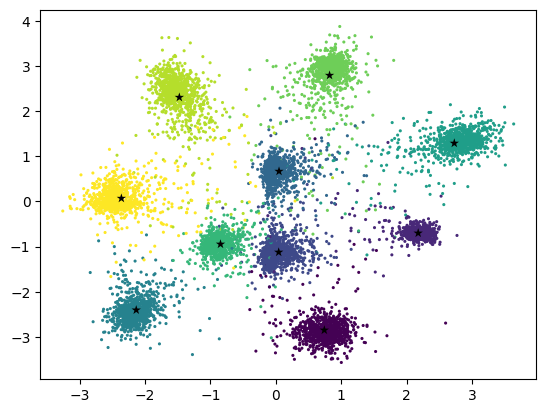

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(test_features[:,0],test_features[:,1],c=y_test,edgecolor="none",s=5)
plt.scatter(test_centers[:,0],test_centers[:,1],c="black",marker="*",edgecolor="none",s=50)
plt.show()